In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 


In [103]:
csv_file='/Users/user/Downloads/Bank Marketing Dataset/df_X.csv'
dataset=pd.read_csv(csv_file)
dataset

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   45211 non-null  int64 
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     8252 non-null   object
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [105]:
dataset.isnull().sum()

Unnamed: 0         0
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [106]:
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [107]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ore=OrdinalEncoder()
for column in dataset.columns:
    if dataset[column].dtype=='object':
        dataset[column]=ore.fit_transform(dataset[[column]])

In [108]:
dataset

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,NaN,5,8.0,261,1,-1,0,NaN
1,1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,NaN,5,8.0,151,1,-1,0,NaN
2,2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,NaN,5,8.0,76,1,-1,0,NaN
3,3,47,1.0,1.0,NaN,0.0,1506,1.0,0.0,NaN,5,8.0,92,1,-1,0,NaN
4,4,33,NaN,2.0,NaN,0.0,1,0.0,0.0,NaN,5,8.0,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,NaN
45207,45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,NaN
45208,45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0
45209,45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,NaN


In [109]:
from sklearn.impute import SimpleImputer 
imp=SimpleImputer(strategy='most_frequent')
for column in dataset.columns:
    if dataset[column].isnull().any():
        dataset[column]=imp.fit_transform(dataset[[column]])

In [110]:
dataset.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [111]:
dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,0.0,5,8.0,261,1,-1,0,0.0
1,1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,0.0,5,8.0,151,1,-1,0,0.0
2,2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,0.0,5,8.0,76,1,-1,0,0.0
3,3,47,1.0,1.0,1.0,0.0,1506,1.0,0.0,0.0,5,8.0,92,1,-1,0,0.0
4,4,33,1.0,2.0,1.0,0.0,1,0.0,0.0,0.0,5,8.0,198,1,-1,0,0.0


In [112]:
dataset.describe()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,4.276061,1.167725,1.142664,0.018027,1362.272058,0.555838,0.160226,0.064276,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,0.107540
std,13051.435847,10.618762,3.239553,0.608230,0.652218,0.133049,3044.765829,0.496878,0.366820,0.245247,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.403511
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11302.500000,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,22605.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33907.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,45210.000000,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x137bb9790>,
 'caps': [<matplotlib.lines.Line2D at 0x137bb9be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x133f1fbf0>],
 'medians': [<matplotlib.lines.Line2D at 0x137bba210>],
 'fliers': [<matplotlib.lines.Line2D at 0x137bba510>],
 'means': []}

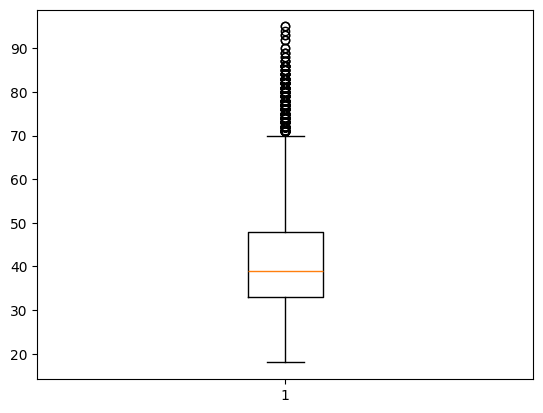

In [113]:
plt.boxplot(dataset['age'])

In [114]:
dataset['age'].quantile(0.001)

19.0

In [115]:
max_threshold,min_threshold=dataset['age'].quantile([0.985,0.001])

In [116]:
dataset=dataset[(dataset.age<max_threshold) & (dataset.age>min_threshold)]


{'whiskers': [<matplotlib.lines.Line2D at 0x137dddf70>,
 'caps': [<matplotlib.lines.Line2D at 0x137dde570>,
 'boxes': [<matplotlib.lines.Line2D at 0x137dddd30>],
 'medians': [<matplotlib.lines.Line2D at 0x137ddeb40>],
 'fliers': [<matplotlib.lines.Line2D at 0x137dded80>],
 'means': []}

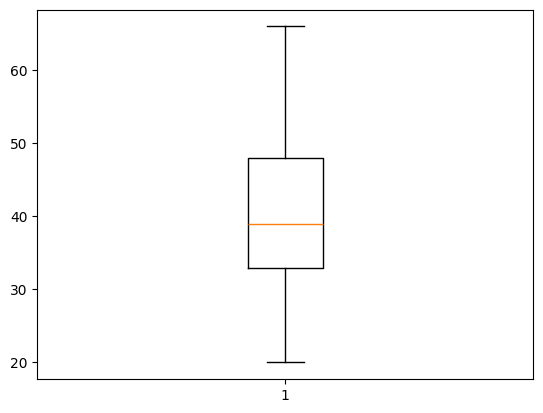

In [117]:
plt.boxplot(dataset['age'])

In [118]:
dataset.describe()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000
mean,22304.993525,40.441699,4.263423,1.172183,1.148822,0.018302,1339.390143,0.564664,0.162807,0.058953,15.824467,5.527296,257.063607,2.775452,39.939450,0.570555,0.102730
std,12935.402673,9.799962,3.260873,0.608455,0.649156,0.134043,2977.617303,0.495806,0.369194,0.235540,8.322854,2.989116,257.203393,3.113988,100.299314,2.300737,0.393243
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11118.750000,33.000000,1.000000,1.000000,1.000000,0.000000,70.000000,0.000000,0.000000,0.000000,8.000000,3.000000,102.000000,1.000000,-1.000000,0.000000,0.000000
50%,22237.500000,39.000000,4.000000,1.000000,1.000000,0.000000,440.000000,1.000000,0.000000,0.000000,16.000000,6.000000,179.000000,2.000000,-1.000000,0.000000,0.000000
75%,33450.250000,48.000000,7.000000,2.000000,2.000000,0.000000,1401.000000,1.000000,0.000000,0.000000,21.000000,8.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,45210.000000,66.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x137e489e0>,
 'caps': [<matplotlib.lines.Line2D at 0x137e48f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x137e48800>],
 'medians': [<matplotlib.lines.Line2D at 0x137e49460>],
 'fliers': [<matplotlib.lines.Line2D at 0x137e49730>],
 'means': []}

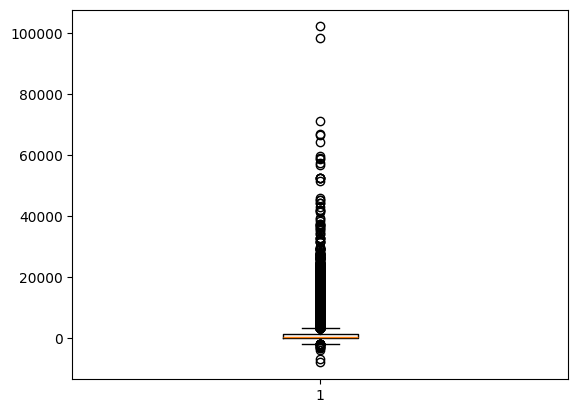

In [119]:
plt.boxplot(dataset['balance'])

In [120]:
for column in dataset['balance']:
    first=dataset['balance'].quantile(0.25)
    second=dataset['balance'].quantile(0.75)
    dataset.loc[dataset['balance'] < first, 'balance'] = first
    dataset.loc[dataset['balance'] > second, 'balance'] = second

In [121]:
for column in dataset['duration']:
    firs=dataset['duration'].quantile(0.25)
    secon=dataset['duration'].quantile(0.90)
    dataset.loc[dataset['duration'] < firs, 'duration'] = firs
    dataset.loc[dataset['duration'] > secon, 'duration'] = secon

In [122]:
dataset.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [123]:
x=dataset.drop(['Unnamed: 0','loan'],axis=1)
y=dataset['loan']

In [124]:
target_imbalance=y.value_counts()
target_imbalance

loan
0.0    37235
1.0     7241
Name: count, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

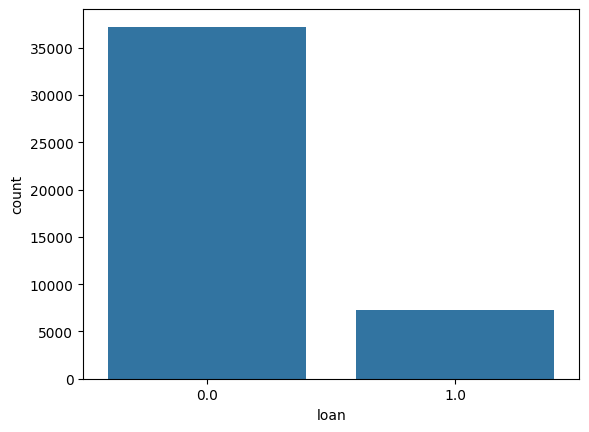

In [125]:
sns.barplot(target_imbalance)

In [126]:
from imblearn.over_sampling import RandomOverSampler
res=RandomOverSampler(sampling_strategy=1)
x,y=res.fit_resample(x,y)

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [128]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    return y_pred

In [129]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

score_tree=[]
score_rand=[]
score_svm=[]
score_neigh=[]

for train_index,test_index in kf.split(x):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    score_tree.append((get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)))
    score_rand.append((get_score(RandomForestClassifier(n_estimators=100,min_samples_split=2),x_train,x_test,y_train,y_test)))
    score_svm.append((get_score(SVC(),x_train,x_test,y_train,y_test)))
    score_neigh.append((get_score(KNeighborsClassifier(),x_train,x_test,y_train,y_test)))
    
    

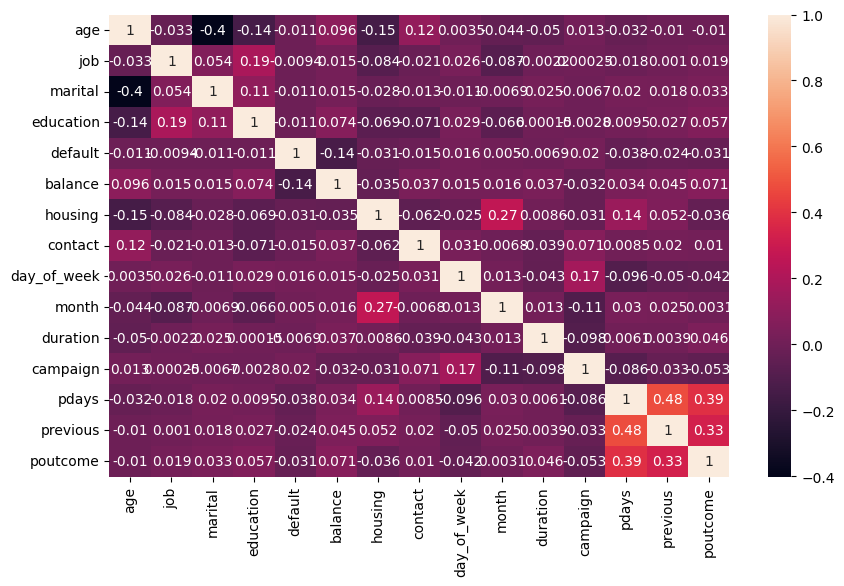

In [138]:
plt.figure(figsize=(10,6))
cor=x_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [139]:
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [142]:
corr_features=correlation(x_train , 0.20)
len(set(corr_features))

4

In [143]:
corr_features 

{'marital', 'month', 'poutcome', 'previous'}

In [144]:
x_train.drop(['marital', 'month', 'poutcome', 'previous'],axis=1)
x_test.drop(['marital', 'month', 'poutcome', 'previous'],axis=1)


,age,job,education,default,balance,housing,contact,day_of_week,duration,campaign,pdays
59576,33,9.0,2.0,0.0,989,1.0,0.0,13,232,3,-1
59577,40,4.0,1.0,0.0,754,0.0,0.0,6,545,1,-1
59578,59,7.0,1.0,0.0,307,1.0,0.0,6,250,7,-1
59579,34,4.0,2.0,0.0,70,1.0,0.0,28,545,7,-1
59580,27,9.0,2.0,0.0,149,0.0,0.0,30,283,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
74465,39,1.0,0.0,0.0,70,1.0,0.0,13,545,5,-1
74466,37,3.0,1.0,0.0,1401,1.0,0.0,3,102,3,202
74467,38,0.0,0.0,0.0,70,1.0,1.0,25,163,5,-1
74468,27,7.0,1.0,0.0,223,1.0,0.0,13,297,2,-1


In [150]:
from sklearn import metrics 
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
metrics.accuracy_score(pred,y_test)

1.0

In [151]:
fore=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters = [{
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 10, None],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]
}]
gridsearch=GridSearchCV(
    estimator=fore,
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
gridsearch=gridsearch.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

In [152]:
accuracy=gridsearch.best_score_
accuracy

0.691167219353491

In [153]:
param=gridsearch.best_params_
param

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [159]:
rand=RandomForestClassifier(max_depth=None,max_features=1,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rand.fit(x_train,y_train)
ppd=rand.predict(x_test)
metrics.accuracy_score(ppd,y_test)

1.0

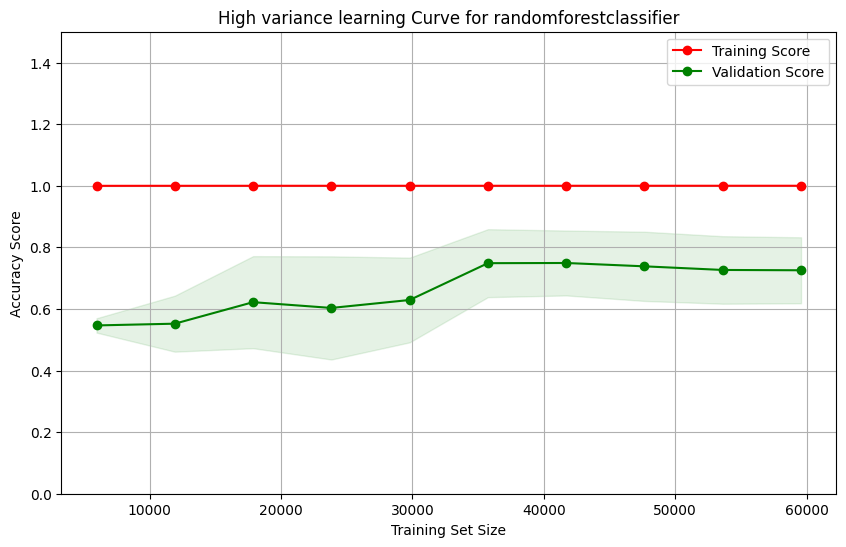

In [160]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    rand
    , x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("High variance learning Curve for randomforestclassifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean,'o-', label="Training Score", color="r")
plt.plot(train_sizes, test_scores_mean,'o-', label="Validation Score", color="g")

plt.ylim(0, 1.5)
plt.legend()
plt.show()
